![banner-image](assets/banner-image.jpg)

<a id='top'></a>
# Project: Loan Default Prediction

## Table of Content
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#gather'>Data Gathering</a></li>
    <li><a href='#explore'>Data Exploration</a></li>
    <li><a href='#merge'>Merging</a></li>
    <li><a href='#process'>Preprocessing</a></li>
    <li><a href='#engineer'>Feature Engineering</a></li>
    <li><a href='#imbalance'>Handling Imbalance</a></li>
    <li><a href='#prediction'>Predication</a></li>
    <li><a href='#results'>Results</a></li>
    <li><a href='#end'>End</a></li>
</ul>

<a id='intro'></a>

## Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

<a id='gather'></a>

## Data Gathering

Collected data from Zindi Competiton - Nigeria dataset.

In [53]:
demo = pd.read_csv("data/train/traindemographics.csv")
perf = pd.read_csv("data/train/trainperf.csv")
prev = pd.read_csv("data/train/trainprevloans.csv")

<a id='explore'></a>

## Data Exploration

1. checking shape for demo, pref and prev datasets
2. checking for duplicate values in customer id in demo and pref. 

In [54]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [55]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [56]:
prev.info

<bound method DataFrame.info of                              customerid  systemloanid  loannumber  \
0      8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1      8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2      8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3      8a8588f35438fe12015444567666018e     301861541           5   
4      8a85890754145ace015429211b513e16     301941754           2   
...                                 ...           ...         ...   
18178  8a858899538ddb8e0153a2b555421fc5     301611754           2   
18179  8a858899538ddb8e0153a2b555421fc5     301761267           9   
18180  8a858899538ddb8e0153a2b555421fc5     301631653           4   
18181  8a858f0656b7820c0156c92ca3ba436f     301697691           1   
18182  8a858faf5679a838015688de3028143d     301715255           2   

                     approveddate                creationdate  loanamount  \
0      2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000 

In [57]:
demo.shape

(4346, 9)

In [58]:
perf.shape

(4368, 10)

In [59]:

prev.info

<bound method DataFrame.info of                              customerid  systemloanid  loannumber  \
0      8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1      8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2      8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3      8a8588f35438fe12015444567666018e     301861541           5   
4      8a85890754145ace015429211b513e16     301941754           2   
...                                 ...           ...         ...   
18178  8a858899538ddb8e0153a2b555421fc5     301611754           2   
18179  8a858899538ddb8e0153a2b555421fc5     301761267           9   
18180  8a858899538ddb8e0153a2b555421fc5     301631653           4   
18181  8a858f0656b7820c0156c92ca3ba436f     301697691           1   
18182  8a858faf5679a838015688de3028143d     301715255           2   

                     approveddate                creationdate  loanamount  \
0      2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000 

In [60]:

demo['customerid'].nunique()

4334

In [61]:
perf['customerid'].nunique()

4368

In [62]:
prev['customerid'].nunique()

4359

<a id='merge'></a>

## Merge data

1. We merged all training data, demographics with performance

Performance (trainpref) is the MAIN dataset since it contains the TARGET (good_bad_flag)

In [64]:
df = perf.merge(demo, on="customerid", how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4376 non-null   object 
 1   systemloanid                4376 non-null   int64  
 2   loannumber                  4376 non-null   int64  
 3   approveddate                4376 non-null   object 
 4   creationdate                4376 non-null   object 
 5   loanamount                  4376 non-null   float64
 6   totaldue                    4376 non-null   float64
 7   termdays                    4376 non-null   int64  
 8   referredby                  589 non-null    object 
 9   good_bad_flag               4376 non-null   object 
 10  birthdate                   3277 non-null   object 
 11  bank_account_type           3277 non-null   object 
 12  longitude_gps               3277 non-null   float64
 13  latitude_gps                3277 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4376 non-null   object 
 1   systemloanid                4376 non-null   int64  
 2   loannumber                  4376 non-null   int64  
 3   approveddate                4376 non-null   object 
 4   creationdate                4376 non-null   object 
 5   loanamount                  4376 non-null   float64
 6   totaldue                    4376 non-null   float64
 7   termdays                    4376 non-null   int64  
 8   referredby                  589 non-null    object 
 9   good_bad_flag               4376 non-null   object 
 10  birthdate                   3277 non-null   object 
 11  bank_account_type           3277 non-null   object 
 12  longitude_gps               3277 non-null   float64
 13  latitude_gps                3277 

In [66]:
prev['approveddate'] = pd.to_datetime(prev['approveddate'])
prev['creationdate'] = pd.to_datetime(prev['creationdate'])
prev['closeddate'] = pd.to_datetime(prev['closeddate'])
prev['firstduedate'] = pd.to_datetime(prev['firstduedate'])
prev['firstrepaiddate'] = pd.to_datetime(prev['firstrepaiddate'])

# repayment delay
prev['repayment_delay'] = (prev['firstrepaiddate'] - prev['firstduedate']).dt.days

# aggregation
agg_prev = prev.groupby("customerid").agg({
    "systemloanid": "count",            # number of previous loans
    "loanamount": ["mean", "max"],
    "totaldue": ["mean"],
    "termdays": ["mean", "max"],
    "repayment_delay": ["mean"],
})

agg_prev.columns = ["_".join(col) for col in agg_prev.columns]
agg_prev.head()

,systemloanid_count,loanamount_mean,loanamount_max,totaldue_mean,termdays_mean,termdays_max,repayment_delay_mean
customerid,,,,,,,
8a1088a0484472eb01484669e3ce4e0b,1,10000.000000,10000.0,11500.000000,15.000000,15,6.000000
8a1a1e7e4f707f8b014f797718316cad,4,17500.000000,30000.0,22375.000000,37.500000,60,-0.250000
8a1a32fc49b632520149c3b8fdf85139,7,12857.142857,20000.0,15214.285714,19.285714,30,-0.428571
8a1eb5ba49a682300149c3c068b806c7,8,16250.000000,30000.0,20300.000000,33.750000,60,-3.125000
8a1edbf14734127f0147356fdb1b1eb2,2,10000.000000,10000.0,12250.000000,22.500000,30,-4.000000


#### Merge aggregated previous-loan statistics

In [67]:
df = df.merge(agg_prev, on="customerid", how="left")

<a id='process'></a>

## Data Preprocessing

#### Handling Categorical

In [68]:
cat_cols = ["bank_account_type", "bank_name_clients", "employment_status_clients",
            "level_of_education_clients"]

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#### Handle Missing Values

median for numeric

mode for categoricals

0 for aggregated features when there are no previous loans

In [69]:
X = df.drop("good_bad_flag", axis=1)
y = df["good_bad_flag"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [70]:
y_train.value_counts(normalize=True)

good_bad_flag
Good    0.782286
Bad     0.217714
Name: proportion, dtype: float64

## Feature Engineering

In [71]:
X = df.drop("good_bad_flag", axis=1)
y = df["good_bad_flag"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Check Imbalance

In [72]:
y_train.value_counts(normalize=True)

good_bad_flag
Good    0.782286
Bad     0.217714
Name: proportion, dtype: float64

In [76]:
df.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag', 'birthdate', 'longitude_gps', 'latitude_gps',
       'bank_branch_clients', 'systemloanid_count', 'loanamount_mean',
       'loanamount_max', 'totaldue_mean', 'termdays_mean', 'termdays_max',
       'repayment_delay_mean', 'bank_account_type_Other',
       'bank_account_type_Savings', 'bank_name_clients_Diamond Bank',
       'bank_name_clients_EcoBank', 'bank_name_clients_FCMB',
       'bank_name_clients_Fidelity Bank', 'bank_name_clients_First Bank',
       'bank_name_clients_GT Bank', 'bank_name_clients_Heritage Bank',
       'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank',
       'bank_name_clients_Stanbic IBTC',
       'bank_name_clients_Standard Chartered',
       'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA',
       'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank',
       '

In [41]:
#feature engineering on bank_name_clients_FCMB
column_to_remove = ['bank_account_type_Savings','bank_name_clients_Diamond Bank','bank_name_clients_EcoBank','bank_name_clients_FCMB','bank_name_clients_Fidelity Bank','bank_name_clients_First Bank','bank_name_clients_GT Bank','bank_name_clients_Heritage Bank','bank_name_clients_Keystone Bank','bank_name_clients_Skye Bank','bank_name_clients_Stanbic IBTC','bank_name_clients_Standard Chartered','bank_name_clients_Sterling Bank','bank_name_clients_UBA','bank_name_clients_FCMB']
df = df.drop(column_to_remove, axis=1)

KeyError: "['bank_account_type_Savings', 'bank_name_clients_Diamond Bank', 'bank_name_clients_EcoBank', 'bank_name_clients_FCMB', 'bank_name_clients_Fidelity Bank', 'bank_name_clients_First Bank', 'bank_name_clients_GT Bank', 'bank_name_clients_Heritage Bank', 'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank', 'bank_name_clients_Stanbic IBTC', 'bank_name_clients_Standard Chartered', 'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA', 'bank_name_clients_FCMB'] not found in axis"

In [45]:
extra_column_to_remove = ['bank_name_clients_Union Bank','bank_name_clients_Unity Bank','bank_name_clients_Wema Bank','bank_name_clients_Zenith Bank', 'employment_status_clients_Retired', 'bank_account_type_Other','employment_status_clients_Self-Employed','employment_status_clients_Student','employment_status_clients_Unemployed','level_of_education_clients_Primary', 'level_of_education_clients_Secondary','level_of_education_clients_Post-Graduate']

df = df.drop(extra_column_to_remove, axis=1)

CLASS DISTRIBUTION ANALYSIS:
Class Good: 2738 samples (78.23%)
Class Bad: 762 samples (21.77%)

Imbalance Ratio: 3.59:1
Majority:Minority = 3.59:1


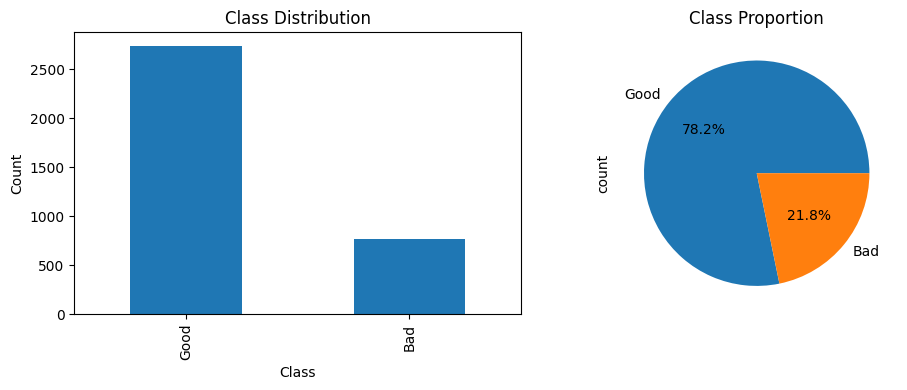

imbalance_ratio: 3.593175853018373
class_counts: Counter({'Good': 2738, 'Bad': 762})


(None, None)

In [52]:
#determining if a column needs to go through over-samping or not
from collections import Counter
from matplotlib import pyplot as plt

def analyze_class_distribution(y):
    """
    Analyze and visualize class distribution
    """
    class_counts = Counter(y)
    total_samples = len(y)

    print("CLASS DISTRIBUTION ANALYSIS:")
    print("=" * 40)

    for class_label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

    # Calculate imbalance ratio
    majority_class = max(class_counts.values())
    minority_class = min(class_counts.values())
    imbalance_ratio = majority_class / minority_class

    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"Majority:Minority = {imbalance_ratio:.2f}:1")

    # Visualization
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    pd.Series(y).value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    pd.Series(y).value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Class Proportion')

    plt.tight_layout()
    plt.show()

    return imbalance_ratio, class_counts

imbalance_ratio, class_counts = analyze_class_distribution(y_train)
print(f"imbalance_ratio: {imbalance_ratio}"), print(f"class_counts: {class_counts}")

convert result into csv

In [46]:
df.to_csv("data/train/loan_default_data.csv", index=False)

<a id='results'></a>

## Results

<a id='end'></a>

## End

<li><a href='#top'>Back to top</a></li>